## EP1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#### Importa os metadados

In [2]:
metadata = pd.read_csv(rf"../metadados.csv", sep=';')

In [3]:
metadata.head()

img classe_1 classe_2  classe_3        classe_4 classe_5    fundo  \
0  001.JPEG    garfo    pilha      faca          colher      NaN     sofa   
1  002.JPEG      som    livro  capacete             NaN      NaN     sofa   
2  003.JPEG    pilha   caneta     livro        capacete      NaN     chao   
3  004.JPEG      som    livro  capacete             NaN      NaN     sofa   
4  005.JPEG     faca    garfo  capacete  protetor solar      NaN  bancada   

       iluminacao  
0   interno-claro  
1   interno-claro  
2   interno-claro  
3  interno-escuro  
4   interno-claro

#### Criação da tabela sumária geral:

In [4]:
# Define uma nova coluna "classe" para agrupar todas as classes presentes em cada imagem

metadata['classe'] = metadata['classe_1']

for i in range(2, 6):
    metadata['classe'] += ', ' + metadata.apply(lambda row: row['classe_' + str(i)] if pd.notnull(row['classe_' + str(i)]) else '', axis=1)

# Remove ',' no final do string
metadata['classe'] = metadata['classe'].str.rstrip(', ')

In [5]:
# Separa as palavras por vírgula e cria uma lista única de palavras
palavras_unicas = set(palavra.strip() for palavra in ','.join(metadata['classe']).split(',') if palavra)
# Converte o conjunto de volta para uma lista
lista_palavras_unicas = list(palavras_unicas)

In [6]:

def get_folder_size(path):
    # Define o tamanho de uma pasta

    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size / (1024 * 1024)  # Converte bytes para megabytes

# retorna tamanho em MB das fotos reescaladas
tamanho_mb = get_folder_size("../data_resized/")

In [7]:
def get_image_resolutions(path):

    # pega a resolução das imagens no diretório de interesse
    resolutions = []
    for filename in os.listdir(path):
        if filename.lower().endswith('.jpeg'):  # Exemplo para imagens PNG
            image_path = os.path.join(path, filename)
            image = plt.imread(image_path)
            resolutions.append(image.shape[:2])  # (linhas, colunas)
    return pd.DataFrame(resolutions, columns=['Linhas', 'Colunas'])

# Obtem a resolução média (linhas x Colunas)
resolucoes_df = get_image_resolutions("../data_resized/")
linhas = (sum(resolucoes_df['Linhas'])/len(resolucoes_df['Linhas']))
colunas = (sum(resolucoes_df['Colunas'])/len(resolucoes_df['Colunas']))

##### TABELA SUMÁRIA

In [8]:
print(
    f'''
#############################################
    
Tabela Global sumária:
    > Nome das classes: {lista_palavras_unicas}
    > Número das classes: {len(lista_palavras_unicas)}
    > Número de imagens: {len(metadata)}
    > Tamanho da base: {round(tamanho_mb, 2)} MB
    > Resolução das imagens: {round(linhas, 0)} linhas X {round(colunas, 0)} colunas
    
#############################################
'''
)


#############################################
    
Tabela Global sumária:
    > Nome das classes: ['som', 'caneca', 'colher', 'livro', 'faca', 'garfo', 'pilha', 'protetor solar', 'capacete', 'caneta']
    > Número das classes: 10
    > Número de imagens: 10
    > Tamanho da base: 0.44 MB
    > Resolução das imagens: 600.0 linhas X 800.0 colunas
    
#############################################



#### Criação da Tabela Detalhada por Classe 

In [9]:
resumos = []

# Iterando pelas palavras únicas
for classe in lista_palavras_unicas:
    # Filtrando o dataframe para linhas que contêm a classe
    filtered_df = metadata[metadata['classe'].str.contains(classe, na=False)]

    # Contando a quantidade de cada objeto por foto
    # Inicializando listas para armazenar as contagens
    counts = []
    
    # Splitando a coluna "classe" para contar a quantidade de cada objeto por foto
    counts = filtered_df['classe'].str.split(', ')
    counts = counts.apply(lambda x: len(x))
    
    
    # Calculando a quantidade mínima e máxima de objetos por foto
    min_count = min(counts)
    max_count = max(counts)
    
    # Verificando as variações de fundo e iluminação
    fundos = filtered_df['fundo'].unique()
    iluminacoes = filtered_df['iluminacao'].unique()
    
    # Calculando o número total de fotos e repetições
    total_fotos = len(filtered_df)

    # Calculando as repetições para cada fundo e cada iluminação
    repeticoes_fundos = filtered_df.groupby('fundo')['classe'].apply(lambda x: x.str.count(classe).sum()).to_dict()
    repeticoes_iluminacoes = filtered_df.groupby('iluminacao')['classe'].apply(lambda x: x.str.count(classe).sum()).to_dict()
    
    # Criando o resumo e adicionando à lista
    resumo = {
        'Objeto': classe,
        'Min_Objetos': min_count,
        'Max_Objetos': max_count,
        'Variações_Fundo': len(fundos),
        'Fundos': ', '.join(fundos),
        'Repetições_Fundos': repeticoes_fundos,
        'Variações_Iluminação': len(iluminacoes),
        'Iluminações': ', '.join(iluminacoes),
        'Repetições_Iluminações': repeticoes_iluminacoes,
        'Total_Fotos': len(filtered_df)
    }
    resumos.append(resumo)
# Criando o dataframe de resumo
df_resumo = pd.DataFrame(resumos)

##### TABELA DETALHADA POR CLASSE

In [10]:
df_resumo

Objeto  Min_Objetos  Max_Objetos  Variações_Fundo  \
0             som            3            5                1   
1          caneca            3            5                1   
2          colher            4            5                1   
3           livro            3            4                2   
4            faca            4            4                2   
5           garfo            4            5                2   
6           pilha            4            4                2   
7  protetor solar            3            4                2   
8        capacete            3            4                3   
9          caneta            4            5                2   

                Fundos                     Repetições_Fundos  \
0                 sofa                           {'sofa': 4}   
1                 sofa                           {'sofa': 4}   
2                 sofa                           {'sofa': 4}   
3           sofa, chao                {'chao': 1, 'sofa': 4}   
4        sofa, bancada             {'bancada': 1, 'sofa': 2}   
5        sofa, bancada             {'bancada': 1, 'sofa': 4}   
6           sofa, chao                {'chao': 1, 'sofa': 2}   
7        bancada, sofa             {'bancada': 1, 'sofa': 2}   
8  sofa, chao, bancada  {'bancada': 1, 'chao': 1, 'sofa': 2}   
9           chao, sofa                {'chao': 1, 'sofa': 2}   

   Variações_Iluminação                    Iluminações  \
0                     2  interno-claro, interno-escuro   
1                     2  interno-claro, interno-escuro   
2                     2  interno-claro, interno-escuro   
3                     2  interno-claro, interno-escuro   
4                     2  interno-claro, interno-escuro   
5                     2  interno-claro, interno-escuro   
6                     2  interno-claro, interno-escuro   
7                     2  interno-claro, interno-escuro   
8                     2  interno-claro, interno-escuro   
9                     2  interno-claro, interno-escuro   

                      Repetições_Iluminações  Total_Fotos  
0  {'interno-claro': 2, 'interno-escuro': 2}            4  
1  {'interno-claro': 2, 'interno-escuro': 2}            4  
2  {'interno-claro': 2, 'interno-escuro': 2}            4  
3  {'interno-claro': 3, 'interno-escuro': 2}            5  
4  {'interno-claro': 2, 'interno-escuro': 1}            3  
5  {'interno-claro': 3, 'interno-escuro': 2}            5  
6  {'interno-claro': 2, 'interno-escuro': 1}            3  
7  {'interno-claro': 2, 'interno-escuro': 1}            3  
8  {'interno-claro': 3, 'interno-escuro': 1}            4  
9  {'interno-claro': 2, 'interno-escuro': 1}            3

#### Plot ds imagens

##### Plot de amostras aleatórias

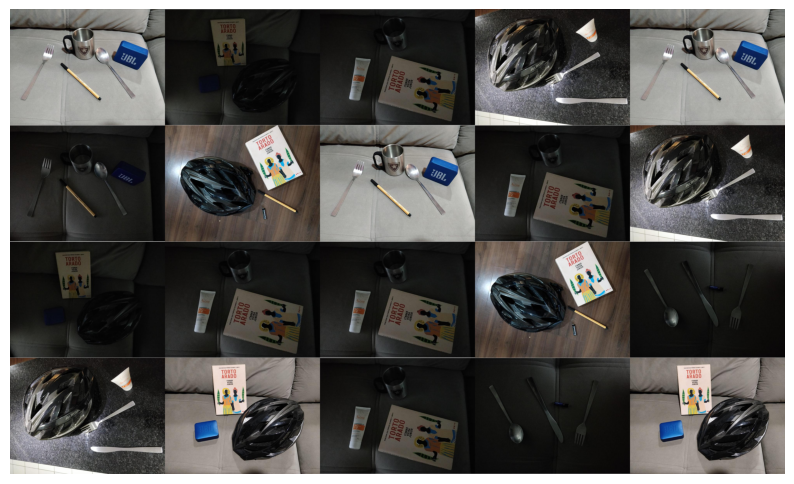

In [11]:

# Caminho para o diretório das imagens
caminho_imagens = "../data_resized/"

# Selecionando aleatoriamente um conjunto de imagens
np.random.seed(42)  # Definindo a semente aleatória para reprodução
sample_imgs = metadata['img'].sample(20, replace=True)  # Selecionando 20 imagens aleatórias do dataframe

# Carregando e plotando as imagens usando a função plot_sample
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

def tile(imgs, n=20):
    return np.vstack([np.hstack(img_chunk) for img_chunk in chunks(imgs, n)])

def plot_sample(x):
    nrows = int(np.sqrt(len(x)) + 0.5)
    ncols = len(x) // nrows + (1 if len(x) % nrows != 0 else 0)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(tile(x, ncols))
    plt.axis('off')
    plt.show()

# Carregando e plotando as imagens selecionadas
figuras = [mpimg.imread(os.path.join(caminho_imagens, img_name)) for img_name in sample_imgs if os.path.exists(os.path.join(caminho_imagens, img_name))]
plot_sample(figuras)

##### Uma imagem por classe

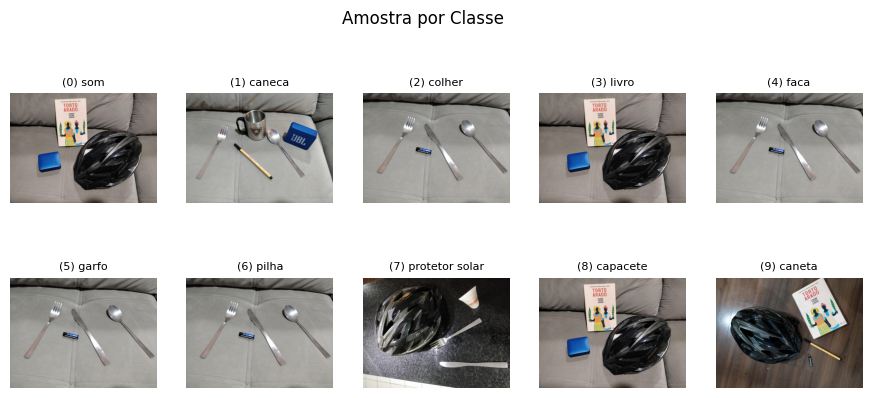

In [12]:
def plot_classes(label_imgs, labels, title=None):
    num_classes = len(labels)
    
    # Definir o número de colunas com base no número de classes
    if num_classes <= 3:
        cols = num_classes
    elif num_classes <= 9:
        cols = 3
    else:
        cols = 5
    
    rows = num_classes // cols + (1 if num_classes % cols != 0 else 0)
    
    fig, axarr = plt.subplots(rows, cols, figsize=(cols * 2.2, rows * 2.2))
    for i, (label_img, label) in enumerate(zip(label_imgs, labels)):
        row, col = i // cols, i % cols
        ax = axarr[row, col] if rows > 1 else axarr[col]
        ax.imshow(label_img)
        ax.set_title(f'({i}) {label}', fontsize=8)
        ax.axis('off')
    if title is not None:
        plt.suptitle(title, y=1.02)
    plt.show()

# Caminho para o diretório das imagens redimensionadas
caminho_imagens_redimensionadas = "../data_resized/"

# Lista de classes únicas
classes_unicas = set(metadata['classe'].dropna().apply(lambda x: x.split(', ')).explode().unique())

# Lista para armazenar uma imagem representativa de cada classe
label_imgs = []
labels = []

# Carregar uma imagem representativa para cada classe
for classe in classes_unicas:
    # Encontrar uma imagem correspondente à classe
    img_name = metadata[metadata['classe'].apply(lambda x: classe in x)].iloc[0]['img']
    img_path = os.path.join(caminho_imagens_redimensionadas, img_name)
    
    # Carregar e adicionar a imagem e a classe às listas
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        label_imgs.append(img)
        labels.append(classe)

# Plotar as amostras por classe
plot_classes(label_imgs, labels, title="Amostra por Classe")

##### Plot de amostras por classe 

In [13]:
def plot_per_class(x, y, label_imgs, max_per_class=20, title=''):
    # Plota as imagens por cada classe

    rows = []
    
    # Calcula o número máximo de amostras por classe
    max_per_class = min(max_per_class, max(len(sublist) for sublist in y))
    
    for i, label_img in enumerate(label_imgs):
        idx = [j for j, sublist in enumerate(y) if i in sublist]
        idx = np.random.choice(idx, min(max_per_class, len(idx)), replace=False)
        
        # Carregar e redimensionar imagens para plotar
        imgs_to_plot = []
        for img_idx in idx:
            img_name = metadata.iloc[img_idx]['img']
            img_path = os.path.join(caminho_imagens_redimensionadas, img_name)
            
            if os.path.exists(img_path):
                img = mpimg.imread(img_path)
                imgs_to_plot.append(img)
                
        # Preencher com imagens vazias se houver menos de 20 por classe
        while len(imgs_to_plot) < max_per_class:
            imgs_to_plot.append(np.ones_like(label_img))
        
        row_images = np.hstack((label_img, np.ones_like(label_img[:, :10]), *imgs_to_plot))
        rows.append(row_images)
    
    # Adiciona o nome da classe como título para cada linha de imagens
    fig, axes = plt.subplots(len(label_imgs), 1, figsize=(20, 3 * len(label_imgs)))
    
    for ax, row, label in zip(axes, rows, classes_unicas):
        ax.imshow(row)
        ax.axis('off')
        ax.set_title(label, fontsize=12)
    
    plt.suptitle(title, fontsize=16)
    plt.show()

# Caminho para o diretório das imagens redimensionadas
caminho_imagens_redimensionadas = "../data_resized/"

# Lista de classes únicas
classes_unicas = set(metadata['classe'].dropna().apply(lambda x: x.split(', ')).explode().unique())

# Lista para armazenar uma imagem representativa de cada classe
label_imgs = []

# Carregar uma imagem representativa para cada classe
for classe in classes_unicas:
    img_name = metadata[metadata['classe'].apply(lambda x: classe in x)].iloc[0]['img']
    img_path = os.path.join(caminho_imagens_redimensionadas, img_name)
    
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        label_imgs.append(img)

# Converter lista de classes em um dicionário para mapear classe -> índice
class_to_idx = {classe: idx for idx, classe in enumerate(classes_unicas)}

# Mapear as classes da coluna 'classe' do dataframe para índices
y = metadata['classe'].apply(lambda x: [class_to_idx[c.strip()] for c in x.split(', ')]).tolist()

# Plotar as amostras por classe
plot_per_class(None, y, label_imgs, max_per_class=20, title='Amostra por Classe')